In [143]:
import os
import pandas as pd
import re
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata.metadata import ACL_metadata
from metadata import Gender
from collections import defaultdict
from itertools import chain
import numpy as np
%matplotlib inline

import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
#from plotly.graph_objs import *
#import plotly 
#plotly.tools.set_credentials_file(username='RamonaComanescu', api_key='ZZR0OIrpZCow6nTAUPR0')
#plotly.offline.init_notebook_mode()
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
def clamp(x): 
    return max(0, min(x, 255))
def get_htmlcol(c):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(c[0]), clamp(c[1]), clamp(c[2]))
%matplotlib inline

np.random.seed(42)

In [2]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

In [4]:
df

,authors,genders,title,venue,year
id,,,,,
E03-1001,"[Oard,Douglasw]",[Gender.male],Multilingual Access To Large Spoken Archives (...,EACL,2003
E03-1002,"[Henderson,Jamesb]",[Gender.male],Neural Network Probability Estimation For Broa...,EACL,2003
E03-1003,"[Burstein,Jill, Wolska,Magdalena]","[Gender.female, Gender.female]",Toward Evaluation Of Writing Style: Overly Rep...,EACL,2003
E03-1004,"[Cmejrek,Martin, Curin,Jan, Havelka,Jiri]","[Gender.male, Gender.male, Gender.male]",Czech-English Dependency Tree-Based Machine Tr...,EACL,2003
E03-1005,"[Bod,Rens]",[Gender.male],An Efficient Implementation Of A New DOP Model,EACL,2003
E03-1006,"[Smets,Martine, Gamon,Michael, Corstonoliver,S...","[Gender.female, Gender.male, Gender.male, Gend...",French Amalgam: A Quick Adaptation Of A Senten...,EACL,2003
E03-1007,"[Ueffing,Nicola, Ney,Hermann]","[Gender.female, Gender.male]",Using POS Information For SMT Into Morphologic...,EACL,2003
E03-1008,"[Steedman,Mark, Osborne,Miles, Sarkar,Anoop, C...","[Gender.male, Gender.male, Gender.male, Gender...",Bootstrapping Statistical Parsers From Small D...,EACL,2003
E03-1009,"[Clark,Alexander]",[Gender.male],Combining Distributional And Morphological Inf...,EACL,2003


In [8]:
for paper in df.authors:
    print(paper)

['Oard,Douglasw']
['Henderson,Jamesb']
['Burstein,Jill', 'Wolska,Magdalena']
['Cmejrek,Martin', 'Curin,Jan', 'Havelka,Jiri']
['Bod,Rens']
['Smets,Martine', 'Gamon,Michael', 'Corstonoliver,Simonh', 'Ringger,Erick']
['Ueffing,Nicola', 'Ney,Hermann']
['Steedman,Mark', 'Osborne,Miles', 'Sarkar,Anoop', 'Clark,Stephen', 'Hwa,Rebecca', 'Hockenmaier,Julia', 'Ruhlen,Paul', 'Baker,Steven', 'Crim,Jeremiah']
['Clark,Alexander']
['Yasuda,Keiji', 'Sugaya,Fumiaki', 'Takezawa,Toshiyuki', 'Yamamoto,Seiichi', 'Yanagida,Masuzo']
['Dingli,Alexiei', 'Ciravegna,Fabio', 'Guthrie,David', 'Wilks,Yorick']
['Alexin,Zoltan', 'Gyimothy,Tibor', 'Hatvani,Csaba', 'Tihanyi,Laszlo', 'Csirik,Janos', 'Bibok,Karoly', 'Proszeky,Gabor']
['Hosaka,Junko', 'Koh,Judice', 'Konagaya,Akihiko']
['Zabokrtsky,Zdenek', 'Smrz,Otakar']
['Poibeau,Thierry']
['Horacek,Helmut']
['Bentivogli,Luisa', 'Pianta,Emanuele']
['Piwek,Paul']
['Dorow,Beate', 'Widdows,Dominic']
['Sripada,Somayajulug', 'Reiter,Ehud', 'Hunter,Jim', 'Yu,Jin']
['Nerima,Luk

['Hedegaard,Steffen', 'Simonsen,Jakobgrue']
['Liu,Fei', 'Weng,Fuliang', 'Wang,Bingqing', 'Liu,Yang']
['Reddy,Sravana', 'Knight,Kevin']
['Harpalani,Manoj', 'Hart,Michael', 'Singh,Sandesh', 'Johnson,Rob', 'Choi,Yejin']
['Kiddon,Chloe', 'Brun,Yuriy']
['Morbini,Fabrizio', 'Sagae,Kenji']
['Johansson,Richard', 'Moschitti,Alessandro']
['Alm,Ceciliaovesdotter']
['Levitan,Rivka', 'Gravano,Agustin', 'Hirschberg,Julia']
['Margolis,Anna', 'Ostendorf,Mari']
['Elsner,Micha', 'Charniak,Eugene']
['Bittar,Andre', 'Amsili,Pascal', 'Denis,Pascal', 'Danlos,Laurence']
['Pang,Bo', 'Kumar,Ravi']
['Manshadi,Mehdi', 'Allen,Jamesf', 'Swift,Mary']
['Jagarlamudi,Jagadeesh', 'Daume,Hal', 'Udupa,Raghavendra']
['Banches,Rafaele', 'Li,Haizhou']
['Li,Maoxi', 'Zong,Chengqing', 'Ng,Hweetou']
['Xu,Jinxi', 'Chen,Jinying']
['Lin,Hui', 'Bilmes,Jeffa']
['Clark,Jonathanh', 'Dyer,Chris', 'Lavie,Alon', 'Smith,Noaha']
['Mermer,Coskun', 'Saraclar,Murat']
['Zhang,Yue', 'Nivre,Joakim']
['Dekok,Daniel', 'Plank,Barbara', 'Vannoord,Ge

['Zhou,Zhimin', 'Xu,Yu', 'Niu,Zhengyu', 'Lan,Man', 'Su,Jian', 'Tan,Chewlim']
['Zhou,Shusen', 'Chen,Qingcai', 'Xiaolong,Wang']
['Zhou,Dong', 'Lawless,Seamus', 'Min,Jinming', 'Wade,Vincent']
['Zhu,Junguo', 'Yang,Muyun', 'Wang,Bo', 'Li,Sheng', 'Zhao,Tiejun']
['Zhu,Muhua', 'Zhu,Jingbo']
['Zhu,Xiaodan', 'Cherry,Colin', 'Penn,Gerald']
['Zukerman,Ingrid', 'Kowadlo,Gideon', 'Ye,Patrick']
['Han,Dongli', 'Kamochi,Shuntaro', 'Song,Xin', 'Akegawa,Naoki', 'Hori,Tomomasa']
['Wu,Yuehcheng', 'Hsieh,Shukai']
['Mirovsky,Jiri', 'Mladova,Lucie', 'Zabokrtsky,Zdenek']
['Che,Wanxiang', 'Li,Zhenghua', 'Liu,Ting']
['Fabbrizio,Giuseppe', 'Gupta,Narendra', 'Besana,Sveva', 'Mani,Premkumar']
['Wilkens,Rodrigo', 'Villavicencio,Aline', 'Muller,Daniel', 'Wives,Leandro', 'Silva,Fabio', 'Loh,Stanley']
['Tian,Yan']
['Jin,Wei', 'Wu,Xin']
['Bjorkelund,Anders', 'Bohnet,Bernd', 'Hafdell,Love', 'Nugues,Pierre']
['Baldwin,Timothy', 'Pool,Jonathan', 'Colowick,Susan']
['Miltsakaki,Eleni']
['Chen,Weite', 'Lin,Suchu', 'Huang,Shul

['Lin,Xiaojun', 'Fan,Yang', 'Zhang,Meng', 'Wu,Xihong', 'Chi,Huisheng']
['Liu,Ding', 'Gildea,Daniel']
['Medelyan,Olena', 'Frank,Eibe', 'Witten,Ianh']
['Miyao,Yusuke', 'Tsujii,Junichi']
['Muller,Christofe', 'Gurevych,Iryna']
['Murray,Gabriel', 'Carenini,Giuseppe']
['Nakov,Preslav', 'Ng,Hweetou']
['Nastase,Vivi', 'Popescu,Marius']
['Nguyen,Trucvient', 'Moschitti,Alessandro', 'Riccardi,Giuseppe']
['Ovchinnikova,Ekaterina', 'Alexandrov,Theodore', 'Wandmacher,Tonio']
['Ozgur,Arzucan', 'Radev,Dragomirr']
['Paul,Michael', 'Girju,Roxana']
['Pauls,Adam', 'Denero,John', 'Klein,Dan']
['Pitler,Emily', 'Church,Kennethward']
['Qian,Longhua', 'Zhou,Guodong', 'Kong,Fang', 'Zhu,Qiaoming']
['Quan,Changqin', 'Ren,Fuji']
['Sasano,Ryohei', 'Kurohashi,Sadao']
['Srinivasan,Prakash', 'Yates,Alexander']
['Sun,Weiwei', 'Sui,Zhifang', 'Wang,Meng', 'Wang,Xin']
['Suzuki,Hisami', 'Li,Xiao', 'Gao,Jianfeng']
['Teufel,Simone', 'Siddharthan,Advaith', 'Batchelor,Colinr']
['Wang,Richardc', 'Cohen,Williamw']
['Wang,Xinglon

['Strzalkowski,Tomek', 'Cercone,Nick']
['Haas,Andrewr']
['Mellish,Chriss', 'Evans,Roger']
['Savitch,Walterj']
['Pereira,Fernando']
['Dawar,Anuj', 'Vijayshanker,K']
['Church,Kennethward', 'Hanks,Patrick']
['Shieber,Stuartm', 'Vannoord,Gertjan', 'Pereira,Fernando', 'Moore,Robertc']
['Tsutsumi,Taijiro']
['Brown,Peterf', 'Cocke,John', 'Dellapietra,Stephena', 'Dellapietra,Vincentj', 'Jelinek,Frederick', 'Lafferty,Johnd', 'Mercer,Robertl', 'Roossin,Pauls']
['Rayner,Manny', 'Banks,Amelie']
['Alshawi,Hiyan']
['Decary,Michel', 'Lapalme,Guy']
['Bachenko,Joan', 'Fitzpatrick,Eileen']
['Ramsay,Allan']
['Palmer,Martha', 'Finin,Timothyw']
['Lappin,Shalom', 'Mccord,Michaelc']
['Haas,Andrewr']
['Covington,Michaela']
['Justeson,Johns', 'Katz,Slavam']
['Morris,Jane', 'Hirst,Graeme']
['Fass,Dan']
['Norvig,Peter']
['Vanessdykema,Carolj']
['Johnson,Mark']
['Velardi,Paola', 'Fasolo,Michela', 'Pazienza,Mariateresa']
['Zadrozny,Wlodek', 'Jensen,Karen']
['Vitale,Anthonyj']
['Radzinski,Daniel']
['Carpenter,Bob']

['Childs,Loisc', 'Cassel,David']
['Grishman,Ralph']
['Kehler,Andrew', 'Hobbs,Jerryr', 'Appelt,Douglase', 'Bear,John', 'Caywood,Matthew', 'Israel,Davidj', 'Kameyama,Megumi', 'Martin,David', 'Monteleoni,Claire']
['Miller,Scott', 'Crystal,Michael', 'Fox,Heidij', 'Ramshaw,Lancea', 'Schwartz,Richardm', 'Stone,Rebecca', 'Weischedel,Ralphm']
['Nobata,Chikashi', 'Sekine,Satoshi', 'Yangarber,Roman']
['Yangarber,Roman', 'Grishman,Ralph']
['Buckley,Chris', 'Walz,Janet', 'Cardie,Claire', 'Mardis,Scott', 'Mitra,Mandar', 'Pierce,Davidr', 'Wagstaff,Kiri']
['Diamond,Ted', 'Liddy,Elizabethd']
['Kwok,Kuilam']
['Strzalkowski,Tomek', 'Stein,Geesc', 'Wise,Gbowden']
['Baldwin,Breck', 'Morton,Thomass', 'Bagga,Amit']
['Chen,Kuanghua', 'Huang,Shengjie', 'Lin,Wencheng', 'Chen,Hsinhsi']
['Cowie,Jamesr', 'Ludovik,Eugene', 'Molinasalgado,Hugo']
['Firminhand,Therese', 'Mani,Inderjeet']
['Goldsteinstewart,Jade', 'Carbonnell,Jaimeg']
['Hovy,Eduard', 'Lin,Chinyew']
['Mckenna,Mary', 'Liddy,Elizabethd']
['Strzalkowski,T

['Napolitano,Diane']
['Brew,Chris', 'Schilder,Frank']
['']
['Lee,Garygeunbae', 'Han,Sangdo']
['Mihalcea,Rada', 'Azab,Mahmoud']
['Chang,Kaiwei']
['Callisonburch,Chris', 'Ungar,Lyle']
['Schneider,Nathan']
['He,Xiaodong', 'Gao,Jianfeng']
['Volkova,Svitlana', 'Vandurme,Benjamin', 'Yarowsky,David']
['Ellsworth,Michael', 'Schneider,Nathan']
['Grefenstette,Edward']
['Beltagy,Islam', 'Chau,Cuong', 'Boleda,Gemma', 'Garrette,Dan', 'Erk,Katrin', 'Mooney,Raymondj']
['Shen,Hui', 'Bunescu,Razvanc', 'Mihalcea,Rada']
['Agirre,Eneko', 'Cer,Daniel', 'Diab,Mona', 'Gonzalezagirre,Aitor', 'Guo,Weiwei']
['Han,Lushan', 'Lkashyap,Abhay', 'Finin,Tim', 'Mayfield,James', 'Weese,Jonathan']
['Severyn,Aliaksei', 'Nicosia,Massimo', 'Moschitti,Alessandro']
['Croce,Danilo', 'Storch,Valerio', 'Basili,Roberto']
['Marsi,Erwin', 'Moen,Hans', 'Bungum,Lars', 'Sizov,Gleb', 'Gamback,Bjorn', 'Lynum,Andre']
['Wang,Sai', 'Li,Ru', 'Wang,Ruibo', 'Wang,Zhiqiang', 'Zhang,Xia']
['Preiss,Judita', 'Stevenson,Mark']
['Polajnar,Tamara', 

In [31]:
from collections import defaultdict
from itertools import chain
men_coauthors = defaultdict(set)
fem_coauthors = defaultdict(set)
for auths in df.authors:
    for a in auths:
        for aa in auths:
            if a != aa:
                if a in known_f:
                    fem_coauthors[a].add(aa)
                elif a in known_m:
                    men_coauthors[a].add(aa)
    

In [60]:
avg_fem_collabs = 0
fem_numbers = []
for f in fem_coauthors:
    n = len(fem_coauthors[f])
    fem_numbers.append(n)
    avg_fem_collabs += n
avg_fem_collabs /= len(fem_coauthors)

In [94]:
avg_men_collabs = 0
men_numbers = []
for m in men_coauthors:
    n = len(men_coauthors[m])
    men_numbers.append(n)
    avg_men_collabs += n
avg_men_collabs /= len(men_coauthors)

In [96]:
print("Avg fem",avg_fem_collabs)
print("Median fem:",sorted(fem_numbers)[int(len(fem_numbers)/2)])

Avg fem 6.340619694397284
Median fem: 4


In [90]:
print("Avg male",avg_men_collabs)
print("Median male:",sorted(men_numbers)[int(len(men_numbers)/2)])

Avg male 6.664871334530221
Median male: 4


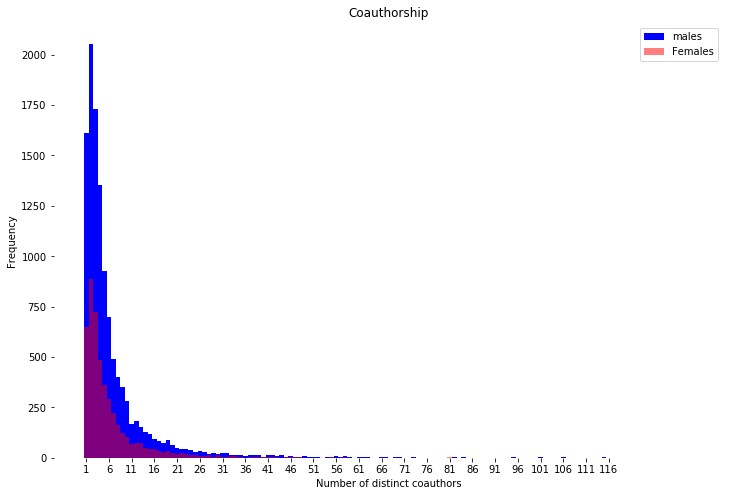

In [158]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,8))
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

labels, values = zip(*Counter(men_numbers).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)
width = 1

ax1.bar(labels, values, width,label="males",color="b")
#ax1.set_title("Males")

labels, values = zip(*Counter(fem_numbers).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)

ax1.bar(labels, values, width,label="Females",alpha=0.5,color="r")
ax1.set_xlabel("Number of distinct coauthors")
ax1.set_ylabel("Frequency")
ax1.set_title("Coauthorship")
ax1.set_xticks(np.arange(1,120,5))
plt.legend()
plt.savefig("plots/Coauthorship.pdf",bbox_inces="tight")
plt.show()

In [147]:
from collections import defaultdict
from itertools import chain
men_cogenders = defaultdict(list)
fem_cogenders = defaultdict(list)
for index, row in df.iterrows():
    authors = row.authors
    genders = row.genders
    for i,a in enumerate(authors):
        for j,aa in enumerate(authors):
            if a != aa:
                if genders[i] == Gender.female:
                    fem_cogenders[a].append(genders[j])
                elif genders[i] == Gender.male:
                    men_cogenders[a].append(genders[j])
    

In [165]:
fem_fem = []
fem_men = []
men_men = []
men_fem = []
for f in fem_cogenders:
    nf= len(list(filter(lambda x: x==Gender.female, fem_cogenders[f])))
    fem_fem.append(nf)
    nm= len(list(filter(lambda x: x==Gender.male, fem_cogenders[f])))
    fem_men.append(nm)
for m in men_cogenders:
    nm= len(list(filter(lambda x: x==Gender.male, men_cogenders[m])))
    men_men.append(nm)
    nf= len(list(filter(lambda x: x==Gender.female, men_cogenders[m])))
    men_fem.append(nf)

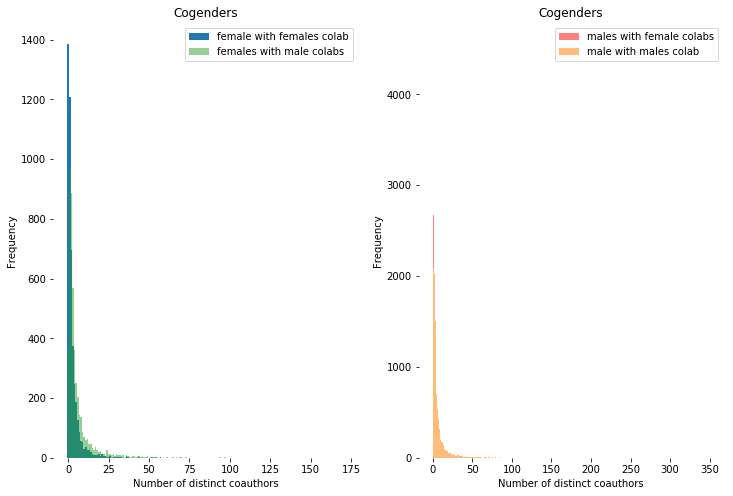

In [197]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

labels, values = zip(*Counter(fem_fem).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)
width = 1

ax1.bar(labels, values, width,label="female with females colab",color=tableau20[0])
#ax1.set_title("Males")

labels, values = zip(*Counter(men_fem).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)

ax2.bar(labels, values, width,label="males with female colabs",alpha=0.5,color='r')
ax1.set_xlabel("Number of distinct coauthors")
ax1.set_ylabel("Frequency")
ax1.set_title("Cogenders")

#ax1.set_xticks(np.arange(1,120,5))


ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False) 

labels, values = zip(*Counter(men_men).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)
width = 1

ax2.bar(labels, values, width,label="male with males colab",color=tableau20[3])
#ax2.set_title("Males")

labels, values = zip(*Counter(fem_men).items())
#values = values/np.sum(values)
indexes = np.arange(1,len(labels)+1)

ax1.bar(labels, values, width,label="females with male colabs",alpha=0.5,color=tableau20[4])
ax2.set_xlabel("Number of distinct coauthors")
ax2.set_ylabel("Frequency")
ax2.set_title("Cogenders")
#ax2.set_xticks(np.arange(1,120,5))
ax2.legend(loc=0)
ax1.legend()

plt.savefig("plots/Cogender.pdf",bbox_inces="tight")
plt.show()

In [195]:
f = np.sum(fem_fem) + np.sum(fem_men)
print("Females with females coauthors: ",np.sum(fem_fem),np.sum(fem_fem)/f)
print("Females with males coauthors: ",np.sum(fem_men),np.sum(fem_men)/f)

Females with females coauthors:  13822 0.326606805293
Females with males coauthors:  28498 0.673393194707


In [196]:
m = np.sum(men_men) + np.sum(men_fem)

print("Males with males coauthors: ",np.sum(men_men),np.sum(men_men)/m)
print("Males with females coauthors: ",np.sum(men_fem),np.sum(men_fem)/m)

Males with males coauthors:  86654 0.752518410449
Males with females coauthors:  28498 0.247481589551


Males tend to publish with men more than females publish with men
( While men are more likely to collaborate with other men, women are more egalitarian. http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0176791)

In [190]:
print(np.average(fem_fem))
print(np.average(fem_men))

2.93336162988
6.04796264856


In [191]:
print(np.average(men_fem))
print(np.average(men_men))

2.43447804545
7.4025286178
